In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import re
import os

In [ ]:
profiling_result_folder = "~/home/lizhouyu/zch_results/result_tbsize_10000_nonzch_dlrmv3_kuairand"
training_metrics_file_path = os.path.join(profiling_result_folder, "training_metrics.csv")
print(training_metrics_file_path)

~/home/lizhouyu/zch_results/result_tbsize_100000_nonzch_dlrmv3_kuairand/training_metrics.csv


In [ ]:
figure_folder = "/home/lizhouyu/zch_results/figures"
os.makedirs(figure_folder, exist_ok=True)

In [ ]:
def get_losses(training_metrics_file_path):
    df_loss_stats = pd.read_csv(training_metrics_file_path)
    # maintain a dictionary of {feature_name: {batch_idx: num_queries_over_all_ranks_at_batch_idx}}
    rank_loss_dict = {}
    for index, row in df_loss_stats.iterrows():
        epoch_idx = row["epoch_idx"]
        batch_idx = row["batch_idx"]
        rank_idx = row["rank"]
        loss = row["loss"]
        if rank_idx not in rank_loss_dict:
            rank_loss_dict[rank_idx] = {}
        if epoch_idx not in rank_loss_dict[rank_idx]:
            rank_loss_dict[rank_idx][epoch_idx] = {}
        rank_loss_dict[rank_idx][epoch_idx][batch_idx] = loss
    # sort the dictionary by epoch_idx and batch_idx
    for rank_idx in rank_loss_dict:
        for epoch_idx in rank_loss_dict[rank_idx]:
            # sort the dictionary by batch_idx
            rank_loss_dict[rank_idx][epoch_idx] = dict(sorted(rank_loss_dict[rank_idx][epoch_idx].items(), key=lambda item: item[0]))
        rank_loss_dict[rank_idx] = dict(sorted(rank_loss_dict[rank_idx].items(), key=lambda item: item[0]))
    return rank_loss_dict

In [ ]:
rank_loss_dict = get_losses(training_metrics_file_path)

rank 2.0: [0, 1, 2, 3, 4], [1.138333797454834, 0.5457656383514404, 0.3342053592205047, 0.6205226182937622, 0.391040027141571]
rank 2.0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1.138333797454834, 0.5457656383514404, 0.3342053592205047, 0.6205226182937622, 0.391040027141571, 0.3396586775779724, 0.321709394454956, 0.283235639333725, 0.2897059023380279, 0.3223789036273956]
rank 2.0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [1.138333797454834, 0.5457656383514404, 0.3342053592205047, 0.6205226182937622, 0.391040027141571, 0.3396586775779724, 0.321709394454956, 0.283235639333725, 0.2897059023380279, 0.3223789036273956, 0.2584977149963379, 0.2114641666412353, 0.1528449356555938, 0.1568348407745361, 0.1585436761379242]
rank 2.0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [1.138333797454834, 0.5457656383514404, 0.3342053592205047, 0.6205226182937622, 0.391040027141571, 0.3396586775779724, 0.321709394454956, 0.283235639333725, 0.2897059023380279, 0.322378903627395

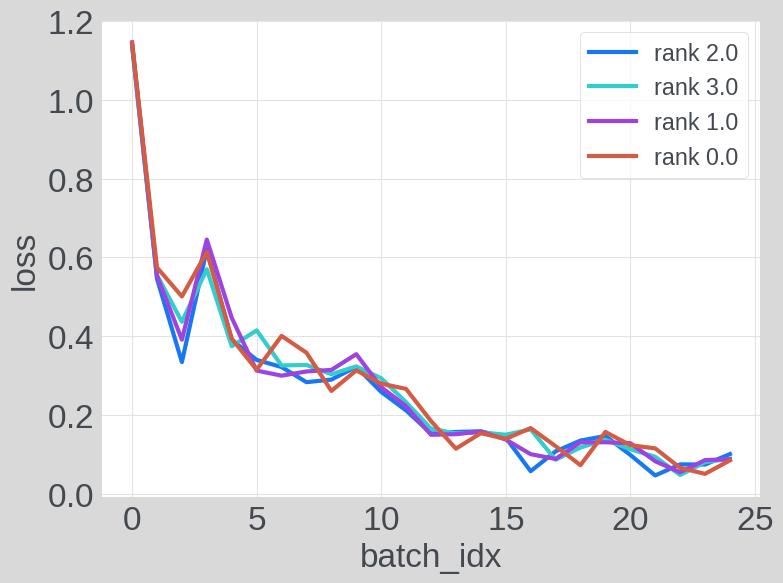

In [ ]:
# plot the loss vs batch_idx
# each rank has a different line
fig = plt.figure(figsize=(8, 6))
font_size = 24
for rank_idx in rank_loss_dict:
    x_list = []
    y_list = []
    num_accumulated = 0
    for epoch_idx in rank_loss_dict[rank_idx]:
        for batch_idx in rank_loss_dict[rank_idx]:
            x_list.append(num_accumulated)
            y_list.append(rank_loss_dict[rank_idx][epoch_idx][batch_idx])
            num_accumulated += 1
        print(f"rank {rank_idx}: {x_list}, {y_list}")
    plt.plot(x_list, y_list, label=f"rank {rank_idx}", linewidth=3)
plt.xlabel("batch_idx", fontsize=font_size)
plt.ylabel("loss", fontsize=font_size)
# plt.title("loss vs batch_idx", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=font_size*0.7)
# save
fig_path = os.path.join(figure_folder, "loss_vs_batch_idx.png")
plt.tight_layout()
fig.savefig(fig_path)
plt.show()
plt.close()